<a href="https://colab.research.google.com/github/Ankush-Chander/deep-learning-101/blob/main/IMDB_BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load database
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
# decoding reviews back to text 
train_data[0]
train_labels[0]
word_index = imdb.get_word_index()
reverse_word_index = {val:key for key, val in word_index.items()}
decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])
print(decoded_review)


? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [ ]:
# encode the integer sequence with multi hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for sample_index, sequence in enumerate(sequences):
    for word_index in sequence:
      results[sample_index][word_index] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
# model definition
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# compile the model
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])


In [ ]:
# set aside validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [ ]:
# Train the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.5088 - accuracy: 0.7873 - val_loss: 0.3835 - val_accuracy: 0.8677
Epoch 2/20
30/30 [==============================] - 1s 50ms/step - loss: 0.3009 - accuracy: 0.9038 - val_loss: 0.3013 - val_accuracy: 0.8889
Epoch 3/20
30/30 [==============================] - 1s 49ms/step - loss: 0.2219 - accuracy: 0.9271 - val_loss: 0.2785 - val_accuracy: 0.8890
Epoch 4/20
30/30 [==============================] - 2s 51ms/step - loss: 0.1770 - accuracy: 0.9425 - val_loss: 0.3005 - val_accuracy: 0.8798
Epoch 5/20
30/30 [==============================] - 1s 50ms/step - loss: 0.1465 - accuracy: 0.9531 - val_loss: 0.2835 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1189 - accuracy: 0.9633 - val_loss: 0.3590 - val_accuracy: 0.8622
Epoch 7/20
30/30 [==============================] - 1s 50ms/step - loss: 0.0998 - accuracy: 0.9708 - val_loss: 0.3145 - val_accuracy: 0.8806
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

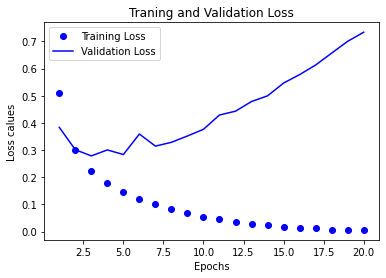

In [ ]:
# plotting training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history 
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training Loss")
plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
plt.title("Traning and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss calues")
plt.legend()
plt.show()
